<a href="https://colab.research.google.com/github/RahulMimani-2024/Technological_Intervention_In_Tourism_Industry/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


RMSE: 106142.203


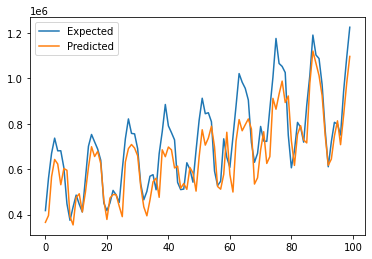

In [90]:
# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	results=model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = results.predict(asarray([testX]))
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		#print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = np.sqrt(metrics.mean_squared_error(test[:, -1], predictions))
	return error, test[:, -1], predictions

# load the dataset
series = read_csv('/content/monthly_tourist_arrivals_india_2002-2018.csv', header=0, usecols=[0])
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
# evaluate
rmse, y, yhat = walk_forward_validation(data,100)
print('RMSE: %.3f' % rmse)
# plot expected vs preducted
#series.plot()
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
#pyplot.plot(series,label='original')
pyplot.show()

1181336.6  , 1161341.0  , 1044256.9  , 772358.6  , 647046.7  , 741813.2  , 873265.44  , 803532.9  , 810975.5  , 1031695.9  , 1180444.8  , 1211852.9  , 1216272.6  , 1194037.0  , 1143140.2  , 819074.25  , 671180.56  , 804424.6  , 961369.56  , 877218.75  , 914320.7  , 1164024.5  , 1191069.0  , 1204401.8  , 

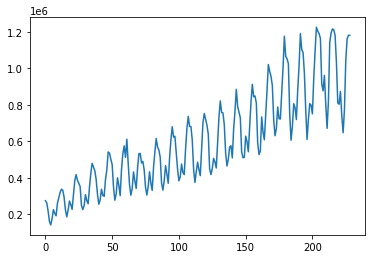

In [81]:
# finalize model and make a prediction for monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# load the dataset
series = read_csv('/content/monthly_tourist_arrivals_india_2002-2018.csv', header=0, usecols=[0])
values = series.values
# transform the time series data into supervised learning
train = series_to_supervised(values, n_in=48)
# split into input and output columns
trainX, trainy = train[:, :-1], train[:, -1]
# fit model
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(trainX, trainy)
# construct an input for a new preduction
row = values[-48:].flatten()
yhat=model.predict(asarray([row]))
# make a one-step prediction
for i in range(24):
	yhat=np.append(model.predict(asarray([row])),yhat)
	print(yhat[0],end='  , ')
	row=np.append(row,yhat[0])
	row=np.delete(row,0)

#print('Input: %s, Predicted: %.3f' % (row, yhat[0]))
#df['forecast']=results.predict(start=180,end=204,dynamic=True)
row=DataFrame(row)
#row.plot()
#plt.plot(row);
yhat=DataFrame(yhat)
yhat.transpose()
series=np.append(series,yhat)
plt.plot(series);

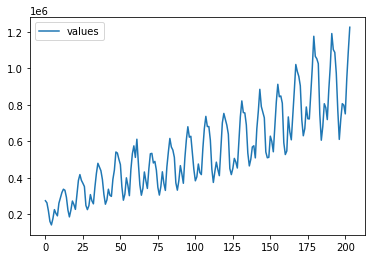

In [80]:
series.plot()